# Approaching Numeric Prediction via Regression Algorithm with Pycaret

### install pycaret library

In [ ]:
# pycaret setup
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 42.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 36.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 53.8 MB/s eta 0:

### import libaries

In [ ]:
# import packages
import numpy as np
import pandas as pd
import pycaret

### data load

In [ ]:
# data load
data_path_url = "https://docs.google.com/spreadsheets/d/1fXu-yhdxhOIsI1Q_2Zhej0kVixaMFV-f/edit?usp=sharing&ouid=111527061809207196930&rtpof=true&sd=true"
data_path_url_for_pandas = data_path_url.replace("/edit?usp=sharing&ouid=111527061809207196930&rtpof=true&sd=true", "/export?format=xlsx")
df = pd.read_excel(data_path_url_for_pandas)
# display all columns
pd.set_option("display.max_columns", None)

### data - main features

In [ ]:
# display first 5 rows
df.head()

,patient_id,glycohemoglobin_percent,gly,age,age_Group,gender,AlbCreRat_mg_g,ALT_u_l,albumin_serum_g_l,ALP_iu_l,AST_u_l,BUN_mg_dl,creatinine_mg_dl,glucose_serum_mg_dl,tbil_mg_dl,calcium_mg_dl,total_protein_g_l,uric_acid_mg_dl,BMI_kg_m2,waist_circ_cm,WBC_u_l,LYM_u_l,MNL_u_l,NEU_u_l,RBC_u_l,hemoglobin_g_dl,MCV_f_l,PLT_u_l,f_glucose_mg_dl,hdl_mg_dl,cholesterol_mg_dl,triglyceride_mg_dl
0,93711,5.7,Pre,56,50-59,Men,3.78,20,40,56,23,14,1.13,98,0.3,9.4,71,4.2,21.3,86.6,5.0,35.5,10.0,53.0,4.65,14.7,92.9,264,107,72,238,48
1,93717,5.1,Normal,22,18-29,Men,4.22,13,43,71,17,14,0.81,83,0.4,9.9,76,6.6,24.5,86.2,5.5,31.3,11.1,50.3,4.82,14.4,91.1,238,91,53,213,102
2,93718,5.7,Pre,45,40-49,Men,5.21,13,42,57,17,14,0.86,83,0.3,9.7,72,4.5,22.0,77.5,6.2,44.0,6.0,46.9,4.71,14.6,91.3,272,89,63,152,46
3,93731,4.9,Normal,20,18-29,Men,3.76,22,45,66,14,12,0.88,89,0.5,9.6,75,7.4,27.6,101.7,8.8,24.9,9.4,61.4,5.58,17.3,88.3,261,98,40,153,78
4,93738,5.6,Normal,26,18-29,Men,7.01,23,43,75,26,19,1.03,94,0.3,9.8,75,5.8,33.7,102.7,7.0,36.0,6.1,55.1,5.56,14.9,81.1,259,102,41,146,79


In [ ]:
# data features
df.describe(include = 'all')

,patient_id,glycohemoglobin_percent,gly,age,age_Group,gender,AlbCreRat_mg_g,ALT_u_l,albumin_serum_g_l,ALP_iu_l,AST_u_l,BUN_mg_dl,creatinine_mg_dl,glucose_serum_mg_dl,tbil_mg_dl,calcium_mg_dl,total_protein_g_l,uric_acid_mg_dl,BMI_kg_m2,waist_circ_cm,WBC_u_l,LYM_u_l,MNL_u_l,NEU_u_l,RBC_u_l,hemoglobin_g_dl,MCV_f_l,PLT_u_l,f_glucose_mg_dl,hdl_mg_dl,cholesterol_mg_dl,triglyceride_mg_dl
count,3036.000000,3036.000000,3036,3036.000000,3036,3036,3036.000000,3036.000000,3036.000000,3036.000000,3036.000000,3036.000000,3036.000000,3036.000000,3036.000000,3036.000000,3036.000000,3036.000000,3036.000000,3036.000000,3036.000000,3036.000000,3036.000000,3036.000000,3036.000000,3036.000000,3036.000000,3036.000000,3036.000000,3036.000000,3036.000000,3036.000000
unique,NaN,NaN,3,NaN,5,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Normal,NaN,60 and over,Men,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1898,NaN,787,2201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,93547.551054,5.748353,NaN,44.652833,NaN,NaN,39.081683,24.955863,42.135046,71.877141,23.998682,14.426877,0.906271,103.976614,0.570840,9.270422,71.901186,5.694269,29.095059,99.856258,6.880237,31.166667,8.364657,56.715843,4.895807,14.450922,88.624144,232.287549,111.575758,51.602767,181.798748,109.215744
std,5570.625851,1.102948,NaN,17.827510,NaN,NaN,257.137551,16.478873,3.592351,23.981398,13.367545,5.627444,0.292145,34.866757,0.309026,0.328676,4.253746,1.468227,6.901926,17.236090,2.854189,8.638406,2.194857,9.372739,0.496893,1.545335,6.194969,61.701166,36.066055,15.192916,39.586962,88.461564
min,83733.000000,4.000000,NaN,18.000000,NaN,NaN,0.940000,3.000000,21.000000,23.000000,8.000000,2.000000,0.300000,19.000000,0.000000,7.800000,56.000000,1.800000,15.500000,63.200000,2.500000,7.000000,1.700000,3.600000,2.520000,6.300000,51.600000,14.000000,21.000000,6.000000,76.000000,10.000000
25%,88599.500000,5.200000,NaN,30.000000,NaN,NaN,4.300000,15.000000,40.000000,57.000000,18.000000,11.000000,0.730000,88.000000,0.400000,9.000000,69.000000,4.600000,24.300000,87.800000,5.500000,25.200000,6.900000,50.575000,4.560000,13.500000,85.700000,191.000000,95.000000,41.000000,153.000000,58.000000
50%,93782.500000,5.500000,NaN,41.000000,NaN,NaN,6.545000,21.000000,42.000000,69.000000,21.000000,14.000000,0.880000,95.000000,0.500000,9.300000,72.000000,5.600000,28.000000,98.350000,6.600000,30.700000,8.100000,57.000000,4.900000,14.600000,89.100000,225.000000,102.000000,49.000000,178.000000,89.000000
75%,98341.500000,5.900000,NaN,60.000000,NaN,NaN,12.370000,29.000000,45.000000,83.000000,26.000000,17.000000,1.020000,105.000000,0.700000,9.500000,75.000000,6.600000,32.800000,110.300000,7.900000,36.700000,9.600000,63.100000,5.220000,15.500000,92.300000,266.000000,112.000000,60.000000,205.000000,134.250000


In [ ]:
# number of unique values
df.nunique()

patient_id                 3036
glycohemoglobin_percent      89
gly                           3
age                          63
age_Group                     5
gender                        2
AlbCreRat_mg_g             1502
ALT_u_l                     111
albumin_serum_g_l            29
ALP_iu_l                    137
AST_u_l                      88
BUN_mg_dl                    51
creatinine_mg_dl            166
glucose_serum_mg_dl         195
tbil_mg_dl                   30
calcium_mg_dl                25
total_protein_g_l            33
uric_acid_mg_dl              93
BMI_kg_m2                   349
waist_circ_cm               733
WBC_u_l                     123
LYM_u_l                     424
MNL_u_l                     138
NEU_u_l                     461
RBC_u_l                     281
hemoglobin_g_dl             104
MCV_f_l                     348
PLT_u_l                     330
f_glucose_mg_dl             205
hdl_mg_dl                   100
cholesterol_mg_dl           226
triglyce

In [ ]:
# types of variables
df.dtypes

patient_id                   int64
glycohemoglobin_percent    float64
gly                         object
age                          int64
age_Group                   object
gender                      object
AlbCreRat_mg_g             float64
ALT_u_l                      int64
albumin_serum_g_l            int64
ALP_iu_l                     int64
AST_u_l                      int64
BUN_mg_dl                    int64
creatinine_mg_dl           float64
glucose_serum_mg_dl          int64
tbil_mg_dl                 float64
calcium_mg_dl              float64
total_protein_g_l            int64
uric_acid_mg_dl            float64
BMI_kg_m2                  float64
waist_circ_cm              float64
WBC_u_l                    float64
LYM_u_l                    float64
MNL_u_l                    float64
NEU_u_l                    float64
RBC_u_l                    float64
hemoglobin_g_dl            float64
MCV_f_l                    float64
PLT_u_l                      int64
f_glucose_mg_dl     

In [ ]:
# number of missing values in columns
df.isnull().sum()

patient_id                 0
glycohemoglobin_percent    0
gly                        0
age                        0
age_Group                  0
gender                     0
AlbCreRat_mg_g             0
ALT_u_l                    0
albumin_serum_g_l          0
ALP_iu_l                   0
AST_u_l                    0
BUN_mg_dl                  0
creatinine_mg_dl           0
glucose_serum_mg_dl        0
tbil_mg_dl                 0
calcium_mg_dl              0
total_protein_g_l          0
uric_acid_mg_dl            0
BMI_kg_m2                  0
waist_circ_cm              0
WBC_u_l                    0
LYM_u_l                    0
MNL_u_l                    0
NEU_u_l                    0
RBC_u_l                    0
hemoglobin_g_dl            0
MCV_f_l                    0
PLT_u_l                    0
f_glucose_mg_dl            0
hdl_mg_dl                  0
cholesterol_mg_dl          0
triglyceride_mg_dl         0
dtype: int64

In [ ]:
# percentage of missing values
df.isnull().sum()*100/len(df)

patient_id                 0.0
glycohemoglobin_percent    0.0
gly                        0.0
age                        0.0
age_Group                  0.0
gender                     0.0
AlbCreRat_mg_g             0.0
ALT_u_l                    0.0
albumin_serum_g_l          0.0
ALP_iu_l                   0.0
AST_u_l                    0.0
BUN_mg_dl                  0.0
creatinine_mg_dl           0.0
glucose_serum_mg_dl        0.0
tbil_mg_dl                 0.0
calcium_mg_dl              0.0
total_protein_g_l          0.0
uric_acid_mg_dl            0.0
BMI_kg_m2                  0.0
waist_circ_cm              0.0
WBC_u_l                    0.0
LYM_u_l                    0.0
MNL_u_l                    0.0
NEU_u_l                    0.0
RBC_u_l                    0.0
hemoglobin_g_dl            0.0
MCV_f_l                    0.0
PLT_u_l                    0.0
f_glucose_mg_dl            0.0
hdl_mg_dl                  0.0
cholesterol_mg_dl          0.0
triglyceride_mg_dl         0.0
dtype: f

In [ ]:
# display column (variable) names
df.columns

Index(['patient_id', 'glycohemoglobin_percent', 'gly', 'age', 'age_Group',
       'gender', 'AlbCreRat_mg_g', 'ALT_u_l', 'albumin_serum_g_l', 'ALP_iu_l',
       'AST_u_l', 'BUN_mg_dl', 'creatinine_mg_dl', 'glucose_serum_mg_dl',
       'tbil_mg_dl', 'calcium_mg_dl', 'total_protein_g_l', 'uric_acid_mg_dl',
       'BMI_kg_m2', 'waist_circ_cm', 'WBC_u_l', 'LYM_u_l', 'MNL_u_l',
       'NEU_u_l', 'RBC_u_l', 'hemoglobin_g_dl', 'MCV_f_l', 'PLT_u_l',
       'f_glucose_mg_dl', 'hdl_mg_dl', 'cholesterol_mg_dl',
       'triglyceride_mg_dl'],
      dtype='object')

In [ ]:
# selected variables as a list
selected_variables_for_glycohemoglobin_percent = [ 'glycohemoglobin_percent',  'age', 'age_Group',
       'gender', 'AlbCreRat_mg_g', 'ALT_u_l', 'albumin_serum_g_l', 'ALP_iu_l',
       'AST_u_l', 'BUN_mg_dl', 'creatinine_mg_dl', 'glucose_serum_mg_dl',
       'tbil_mg_dl', 'calcium_mg_dl', 'total_protein_g_l', 'uric_acid_mg_dl',
       'BMI_kg_m2', 'waist_circ_cm', 'WBC_u_l', 'LYM_u_l', 'MNL_u_l',
       'NEU_u_l', 'RBC_u_l', 'hemoglobin_g_dl', 'MCV_f_l', 'PLT_u_l',
       'f_glucose_mg_dl', 'hdl_mg_dl', 'cholesterol_mg_dl',
       'triglyceride_mg_dl']

In [ ]:
# display data with selected variables
df_a1c_percent = df[selected_variables_for_glycohemoglobin_percent]
df_a1c_percent

,glycohemoglobin_percent,age,age_Group,gender,AlbCreRat_mg_g,ALT_u_l,albumin_serum_g_l,ALP_iu_l,AST_u_l,BUN_mg_dl,creatinine_mg_dl,glucose_serum_mg_dl,tbil_mg_dl,calcium_mg_dl,total_protein_g_l,uric_acid_mg_dl,BMI_kg_m2,waist_circ_cm,WBC_u_l,LYM_u_l,MNL_u_l,NEU_u_l,RBC_u_l,hemoglobin_g_dl,MCV_f_l,PLT_u_l,f_glucose_mg_dl,hdl_mg_dl,cholesterol_mg_dl,triglyceride_mg_dl
0,5.7,56,50-59,Men,3.78,20,40,56,23,14,1.13,98,0.3,9.4,71,4.2,21.3,86.6,5.0,35.5,10.0,53.0,4.65,14.7,92.9,264,107,72,238,48
1,5.1,22,18-29,Men,4.22,13,43,71,17,14,0.81,83,0.4,9.9,76,6.6,24.5,86.2,5.5,31.3,11.1,50.3,4.82,14.4,91.1,238,91,53,213,102
2,5.7,45,40-49,Men,5.21,13,42,57,17,14,0.86,83,0.3,9.7,72,4.5,22.0,77.5,6.2,44.0,6.0,46.9,4.71,14.6,91.3,272,89,63,152,46
3,4.9,20,18-29,Men,3.76,22,45,66,14,12,0.88,89,0.5,9.6,75,7.4,27.6,101.7,8.8,24.9,9.4,61.4,5.58,17.3,88.3,261,98,40,153,78
4,5.6,26,18-29,Men,7.01,23,43,75,26,19,1.03,94,0.3,9.8,75,5.8,33.7,102.7,7.0,36.0,6.1,55.1,5.56,14.9,81.1,259,102,41,146,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3031,4.6,25,18-29,Men,5.38,21,48,47,18,17,0.96,93,0.8,9.5,75,5.2,24.9,88.5,5.6,41.8,6.3,48.6,4.88,15.4,92.7,191,98,54,140,47
3032,5.7,38,30-39,Men,4.57,17,46,75,19,11,0.92,96,0.6,9.9,73,5.6,24.0,92.0,7.7,25.6,5.4,67.5,5.42,16.3,90.6,218,107,39,264,168
3033,5.0,43,40-49,Men,3.26,38,44,59,32,23,0.86,89,0.7,9.3,73,4.5,24.1,94.6,7.6,36.5,10.7,49.6,5.10,16.7,98.0,256,98,52,193,78
3034,5.4,39,30-39,Men,7.73,20,43,70,21,14,0.80,100,0.5,9.4,73,5.0,26.0,92.5,8.8,48.6,8.6,40.4,5.26,15.9,90.9,195,111,53,191,121


## Exploratory analysis with Autoviz

In [ ]:
pip install autoviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 77.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 361.8/361.8 kB 33.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 109.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 117.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 102.8 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of panel to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 45.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 15.5 MB/s eta 0:00:0

In [ ]:
from autoviz.AutoViz_Class import AutoViz_Class
%matplotlib inline
AV = AutoViz_Class()
target_variable = 'glycohemoglobin_percent'
dft = AV.AutoViz(filename='',dfte=df_a1c_percent, depVar=target_variable)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Data preprocessign with pycaret
from pycaret.regression import *

data = df_a1c_percent

s = setup(data, target = 'glycohemoglobin_percent', session_id = 123, numeric_imputation = "knn",
          remove_multicollinearity = True, normalize = True, train_size = 0.8)

,Description,Value
0,Session id,123
1,Target,glycohemoglobin_percent
2,Target type,Regression
3,Original data shape,"(3036, 30)"
4,Transformed data shape,"(3036, 32)"
5,Transformed train set shape,"(2428, 32)"
6,Transformed test set shape,"(608, 32)"
7,Ordinal features,1
8,Numeric features,27
9,Categorical features,2


In [ ]:
# compare different ML models
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.3341,0.2592,0.5037,0.7669,0.0665,0.0563,1.3290
gbr,Gradient Boosting Regressor,0.3313,0.2601,0.5061,0.7636,0.0663,0.0557,0.9750
huber,Huber Regressor,0.3368,0.2709,0.5139,0.7579,0.0665,0.0560,0.1540
br,Bayesian Ridge,0.3429,0.2651,0.5099,0.7573,0.0671,0.0575,0.1400
ridge,Ridge Regression,0.3430,0.2651,0.5099,0.7571,0.0671,0.0576,0.1360
rf,Random Forest Regressor,0.3371,0.2738,0.5187,0.7512,0.0677,0.0566,2.5800
omp,Orthogonal Matching Pursuit,0.3522,0.2751,0.5193,0.7486,0.0687,0.0593,0.1390
lr,Linear Regression,0.3591,0.2882,0.5299,0.7389,0.0702,0.0604,1.0210
xgboost,Extreme Gradient Boosting,0.3594,0.2923,0.5361,0.7372,0.0710,0.0605,0.6460
lightgbm,Light Gradient Boosting Machine,0.3504,0.3006,0.5445,0.7249,0.0694,0.0583,0.5030


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
# create individually 2 best models
et = create_model('et')
gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3921,0.3992,0.6318,0.7663,0.0784,0.0633
1,0.3345,0.2601,0.5100,0.7473,0.0670,0.0561
2,0.3134,0.2037,0.4514,0.6604,0.0634,0.0543
3,0.3398,0.2219,0.4711,0.7163,0.0681,0.0598
4,0.2649,0.1409,0.3754,0.8345,0.0518,0.0456
5,0.3440,0.2699,0.5195,0.7876,0.0664,0.0569
6,0.3506,0.3082,0.5551,0.7357,0.0687,0.0578
7,0.3263,0.1825,0.4272,0.7483,0.0623,0.0573
8,0.3503,0.3622,0.6018,0.8414,0.0727,0.0563


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3752,0.3578,0.5981,0.7905,0.0757,0.0612
1,0.3426,0.3001,0.5478,0.7085,0.0698,0.0566
2,0.3112,0.2040,0.4516,0.6600,0.0632,0.0539
3,0.3241,0.2096,0.4578,0.7321,0.0657,0.0573
4,0.2697,0.1629,0.4036,0.8086,0.0543,0.0461
5,0.3389,0.2588,0.5088,0.7963,0.0642,0.0560
6,0.3400,0.3033,0.5507,0.7399,0.0685,0.0559
7,0.3271,0.1923,0.4385,0.7347,0.0627,0.0571
8,0.3528,0.3488,0.5906,0.8473,0.0723,0.0570


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

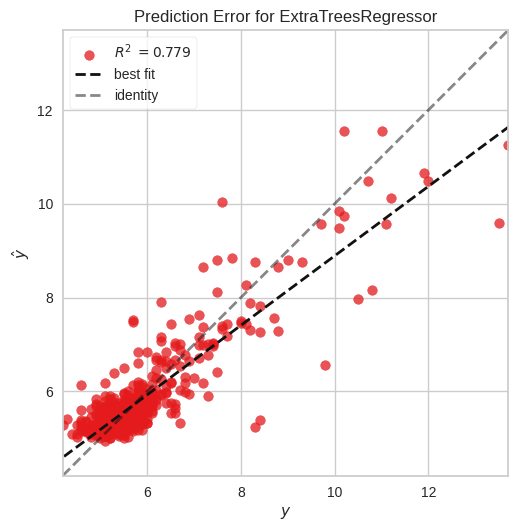

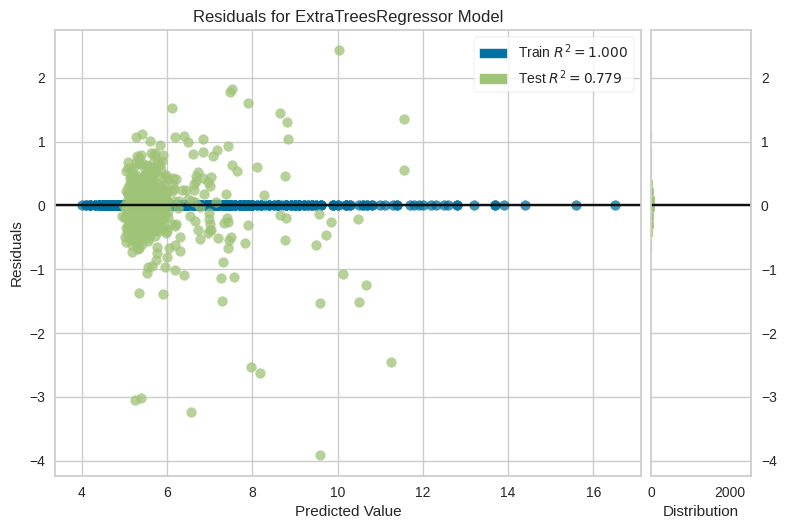

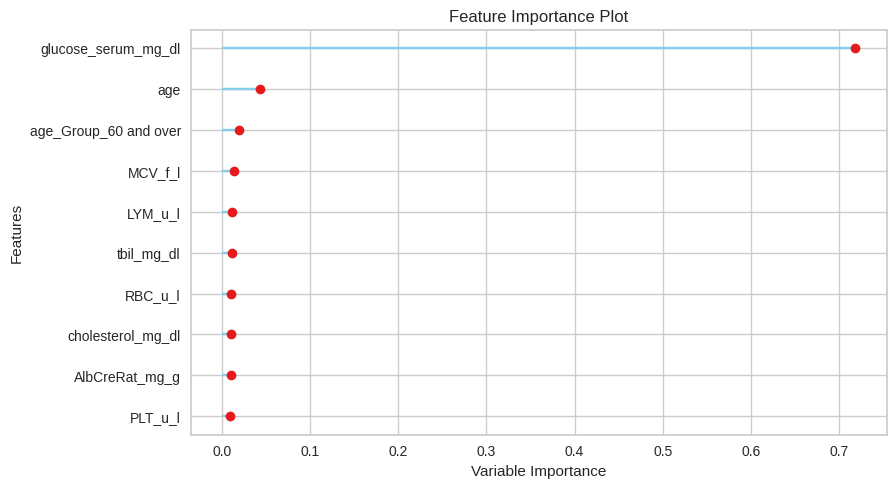

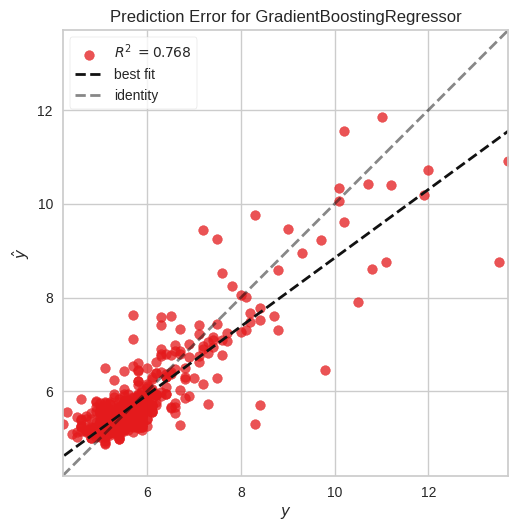

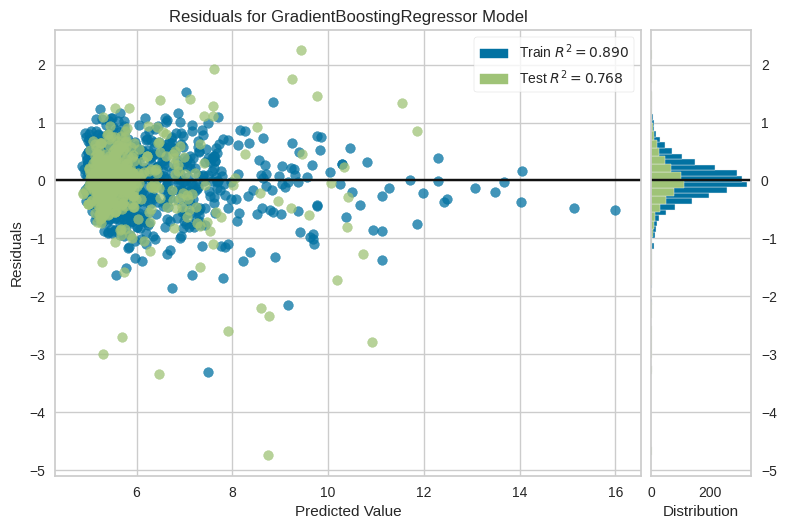

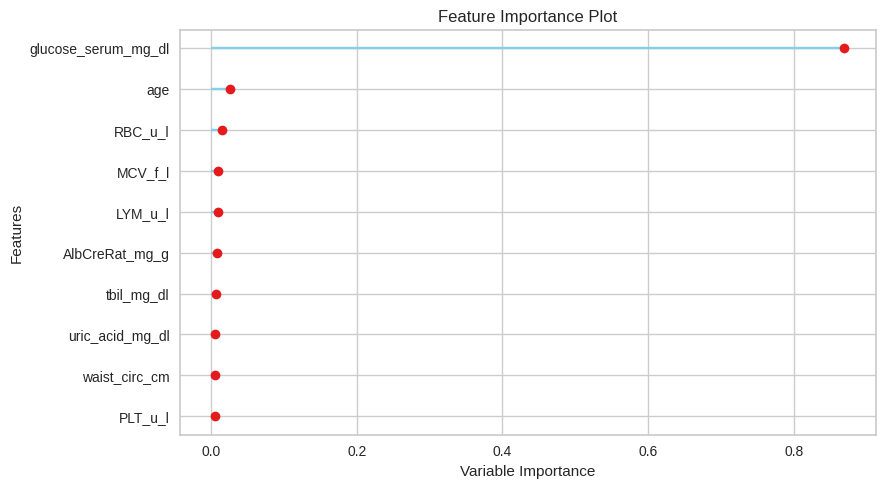

In [ ]:
plot_model(et, plot = 'error')
plot_model(et, plot = 'residuals')
plot_model(et, plot = 'feature')
plot_model(gbr, plot = 'error')
plot_model(gbr, plot = 'residuals')
plot_model(gbr, plot = 'feature')

In [ ]:
predict_model(et)
print('\n')
print('---------------------------------------------------------')
print('\n')
predict_model(gbr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.3381,0.2922,0.5405,0.7785,0.0687,0.0554




---------------------------------------------------------




,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,0.3389,0.3058,0.5530,0.7682,0.0691,0.0553


,age,age_Group,gender,AlbCreRat_mg_g,ALT_u_l,albumin_serum_g_l,ALP_iu_l,AST_u_l,BUN_mg_dl,creatinine_mg_dl,...,RBC_u_l,hemoglobin_g_dl,MCV_f_l,PLT_u_l,f_glucose_mg_dl,hdl_mg_dl,cholesterol_mg_dl,triglyceride_mg_dl,glycohemoglobin_percent,prediction_label
1402,26,18-29,Men,3.08,29,44,67,22,10,0.96,...,4.87,14.9,88.800003,195,94,40,161,114,5.2,5.134922
319,50,50-59,Men,8.16,17,39,55,20,14,0.88,...,5.23,15.0,84.800003,188,96,49,159,39,5.4,5.614219
729,24,18-29,Women,10.46,12,41,61,15,10,0.58,...,4.98,12.7,79.500000,248,99,37,137,32,5.5,5.339255
2626,23,18-29,Men,5.28,20,49,58,29,21,0.85,...,5.10,14.8,86.000000,196,87,47,208,74,5.3,5.157196
1078,60,60 and over,Men,7.98,19,39,94,15,7,0.55,...,5.12,15.0,87.800003,166,111,49,208,138,6.0,5.797772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2322,30,30-39,Men,5.17,27,45,71,22,11,0.95,...,5.36,15.1,83.900002,241,87,54,197,106,5.4,5.311730
2273,18,18-29,Men,4.26,14,43,51,21,11,1.00,...,5.25,15.6,89.400002,168,94,54,111,66,5.3,5.287318
2374,58,50-59,Men,9.05,17,48,46,18,10,0.67,...,4.70,14.2,92.400002,173,102,52,172,154,5.4,5.297496
2377,24,18-29,Men,4.47,43,46,100,25,21,0.86,...,5.18,15.5,86.699997,306,114,49,148,49,4.8,5.415442


# END